# Project Linear Regression; Boston Housing Price

You can find the video explaning this notebook on the resources/ Unit3 in the OWL website.  

In [1]:
# Yes! sklearn has lots of datasets!  
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

We have not talked about numpy yet! Lets do it now:
- Numpy is a Python package for scientific computing 
- It provides multidimensional array object
- Many mathematical operations on vectors and matrixcies can be done using numpy; and it is fast (vectorized code)!
- you can learn more about numpy here: https://numpy.org/doc/stable/user/whatisnumpy.html




In [14]:
# Load the housing dataset
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
# Lets make a dataframe!
boston_df = pd.DataFrame(boston.data)

# column names
boston_df.columns = boston.feature_names
print(boston_df.columns)

boston_df.head()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
target_df = pd.DataFrame(boston.target)

target_df.columns = ['price']

target_df

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


Text(0,0.5,'Counts')

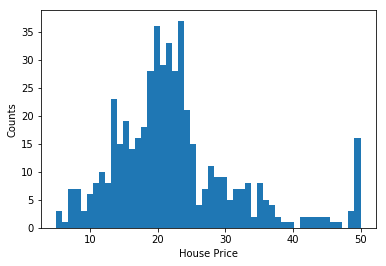

In [23]:
# Histogram of prices (this is the target of our dataset)
plt.hist(target_df['price'],bins=50)

#label
plt.xlabel('House Price')
plt.ylabel('Counts')

We want to find the best linear fit, aka we are using linear regression. As explained in details in Unit 3, the goal of linear regression is to calculate the best coefficients to minimize the residual sum of squared between the the actual target and the estimated target values. We can use Python's Scikit-Learn for this purpose!

See this link for more info about Scikit-Learn linear regression module:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [24]:
# import the library
from sklearn.linear_model import LinearRegression

Steps to take:

- Create a LinearRegression *object* : lreg = LinearRegression()
- Fit a linear model : lreg.fit(X,Y) --> We can see intercept and coefficient values
- Predict Y using the linear model with the estimated coefficients : lreg.predict()
- Check how good is our model/fit: lreg.score()



In [25]:
Y = target_df['price']
X = boston_df

In [26]:

lreg = LinearRegression(normalize=True)

We made the object and we assign True to normalize. Normalize is one of the parameters of this object, when it sets to True, X will be normalized.   



In [27]:
# fit the model 
lreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [28]:
# find the intercept 
lreg.intercept_

36.49110328036144

In [29]:
# find the coefficints for each feature (we have 13 features and for each we will get a coefficient)
lreg.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [30]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [31]:
# Make a dataframe of features 
coeff_df = pd.DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# add a new column for the coefficients
coeff_df["Coefficient Estimate"] = lreg.coef_

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Remember when we talked about the feature importance in Unit 2? Here we go! We can see some of these features are more important than the others! 

# How about doing some prediction? 

We can use the dataset we have; and partition it to test and train set. Using training data, the algorithm *learns* the coeffcients. Then we use the test data (the algorithm has never seen the test data during the training) to do predictions; and we can compare the predicted value with the actual one! 

- To split the data to train and test, we can use skit-learn as shown below

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30)
help(train_test_split)
# we assign 30% of data for test

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int, None, optional
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, the value is set 

In [33]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
Y_pred = lreg.predict(X_test)
print(Y_pred)

[22.11932275 20.69717906 28.83455216 21.35147485 24.91300365 45.3162689
 35.30491298 16.12160976 21.27601177 28.26490131 13.73152129 21.69604949
 40.6276757  20.83789713 17.28512548 22.59904406 23.84036188 17.12180529
 10.79147646 19.12051165 23.16298841 35.21243983 25.57491927 23.32932604
 35.36851087 24.36782651 23.04957372 20.31092766 37.10992904 20.15824369
 18.32620249 12.98587063 11.57135918 22.37407351 25.96445811 19.41371542
 24.12578509 22.54525652 23.41857532 21.01393726 31.08677172 32.68094177
 17.15069395 27.05360951 34.76426204 27.09277233 21.59281387 14.40396369
 17.77537411 31.78420315 22.17618425 29.10643881 15.61871868 26.53253822
 26.67262503 32.79980463 30.84762678 16.40008815 20.49060661 18.02913706
 17.95203877 13.05896343 16.99392288 11.70869161 14.26725294 23.62470645
 13.69652326 22.56883454  9.36920026 35.79295472  8.96436734 10.66098417
 14.9729218  20.18652504 15.39262487 20.49944573 23.2094633  33.98850418
 23.3158248  18.80745696 21.27442418 42.82295305 25.

# Residual Plots

As mentioned in Unit 2, Lesson 4 plotting residulas is useful to realize how good our trained model works on the test set. As shown below, the residulas dont have any specific patter (which is a sign of having a good model). And, thye are wihin an acceptable range. 

Text(0.5,1,'Residual Plots')

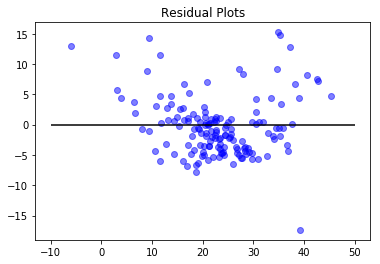

In [36]:
# Scatter plot the testing data
test = plt.scatter(Y_pred,(Y_test-Y_pred),c='b',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.title('Residual Plots')

In [37]:
# MSE for test
MSE = np.mean((Y_test - Y_pred) ** 2)
print(MSE)

24.652122977613406


In [38]:
# MSE for training
MSE = np.mean((Y_train - lreg.predict(X_train)) ** 2)
print(MSE)

21.235325417151767
